

```
# This is formatted as code
```

# Homework 1b Part 2: Pandas

Today we'll practice data exploration in pandas! Each of these cells should consist of **a single line of pandas**, answering the question.

First, you'll need to download the dataset "Top American Colleges 2022" from Kaggle.com and get it into this directory. You'll need to make an account first.

Below is a list of useful functions. Part of this homework is practicing reading the documentation, so you'll want to look them up as you go. I'd recommend starting with this: https://pandas.pydata.org/docs/user_guide/10min.html. Once you've read that, in general you can find the API for any of these functions by searching their name plus pandas.

List of helpful functions:

* read_csv
* head
* unique
* groupby
* apply (An important note about this one--pay careful attention to the weird axis argument. When you apply over a series, you often don't need it, but when you apply over a dataframe axis=1 and axis=0 will do very different things.)
* value_counts
* df.columns ('columns' is a dataframe variable that tracks the columns)
* isin
* fillna
* astype
* hist

***Remember, all answers must be in A SINGLE LINE OF CODE. ***

## The Basics

First, read the dataframe in. Store it in a variable called "df".

In [2]:
import pandas as pd
df = pd.read_csv('/home/alexanderhearn/320_homeworks/CMSC320homework1/top_colleges_2022.csv')

Let's get a feel for our dataframe. Print out a list of columns

In [3]:
columns_names = df.columns
print("List of columns: ", columns_names)

List of columns:  Index(['description', 'rank', 'organizationName', 'state', 'studentPopulation',
       'campusSetting', 'medianBaseSalary', 'longitude', 'latitude', 'website',
       'phoneNumber', 'city', 'country', 'state.1', 'region', 'yearFounded',
       'stateCode', 'collegeType', 'carnegieClassification',
       'studentFacultyRatio', 'totalStudentPop', 'undergradPop',
       'totalGrantAid', 'percentOfStudentsFinAid', 'percentOfStudentsGrant'],
      dtype='object')


Now print out the first ten elements. There's a single function that does it by default.

In [4]:
first_elements = df.head(10)
print("First 10 elements of the DataFrame")
print(first_elements)

First 10 elements of the DataFrame
                                         description  rank  \
0  A leading global research university, MIT attr...     1   
1  Stanford University sits just outside of Palo ...     2   
2  One of the top public universities in the coun...     2   
3  Princeton is a leading private research univer...     4   
4  Located in upper Manhattan, Columbia Universit...     5   
5  The University of California, Los Angeles is t...     6   
6  Located in rural Williamstown, MA, Williams Co...     7   
7  Yale University is the second oldest Ivy Leagu...     8   
8  Duke offers 53 undergraduate majors at its Dur...     9   
9  Founded by Benjamin Franklin, The University o...    10   

                        organizationName state  studentPopulation  \
0  Massachusetts Institute of Technology    MA              12195   
1                    Stanford University    CA              20961   
2     University of California, Berkeley    CA              45878   
3     

## Exploration

Now let's learn to do some exploration. Try printing out the median of  "medianBaseSalary"


In [5]:
median_salary = df['medianBaseSalary'].median()
print("Median of medianBaseSalary", median_salary)

Median of medianBaseSalary 112800.0


Making it a little more complicated--print out the median of  "medianBaseSalary" but only for urban colleges.

In [7]:
#First I will create a variable that only holds urban colleges
urban_df = df[df['campusSetting'] == 'Urban']
urban_median_salary = urban_df['medianBaseSalary'].median()
print("Median salary for Urban Colleges: ", urban_median_salary)

Median salary for Urban Colleges:  113100.0


Now, still using one statement, let's print out median of "medianBaseSalary" for all different possible values of "campusSetting". You'll need a statement we haven't used yet.

In [8]:
groupedMedianSalary = df.groupby('campusSetting')['medianBaseSalary'].median()
print("Median salary for different campus settings")
print(groupedMedianSalary)

Median salary for different campus settings
campusSetting
Rural       111450.0
Suburban    113500.0
Urban       113100.0
Name: medianBaseSalary, dtype: float64


Print out the number of colleges by state. Your results should look something like:

NY    63<br>
CA    55

etc.

In [9]:
collegesByState = df.groupby('state').size()
print("Number of colleges by state")
print(collegesByState)

Number of colleges by state
state
AL     5
AR     2
AZ     4
CA    55
CO     7
CT     8
DC     5
DE     1
FL    14
GA     9
HI     2
IA     5
ID     3
IL    16
IN    12
KS     2
KY     4
LA     4
MA    27
MD    12
ME     4
MI    15
MN    12
MO     8
MS     2
MT     2
NC    11
ND     2
NE     3
NH     4
NJ    16
NM     3
NV     2
NY    63
OH    15
OK     3
OR     9
PA    33
PR     1
RI     5
SC     6
SD     2
TN     9
TX    26
UT     4
VA    14
VT     4
WA    13
WI     8
WV     1
WY     1
dtype: int64


Display just the line for University of Maryland (either one). (There are a couple of ways of doing this.)

In [10]:
UMD = df.loc[df['organizationName'].str.contains('University of Maryland')]
print(UMD)

                                           description  rank  \
39   The University of Maryland, College Park, is a...    40   
134  Located west of Baltimore’s Inner Harbor, the ...   135   

                             organizationName state  studentPopulation  \
39       University of Maryland, College Park    MD              44404   
134  University of Maryland, Baltimore County    MD              15403   

    campusSetting  medianBaseSalary  longitude   latitude  \
39       Suburban          124500.0 -76.937269  38.980725   
134      Suburban          117600.0 -76.551689  39.340100   

                 website  ... yearFounded stateCode collegeType  \
39    http://www.umd.edu  ...      1858.0        MD      Public   
134  http://www.umbc.edu  ...      1966.0        MD      Public   

                                carnegieClassification studentFacultyRatio  \
39   Doctoral Universities: Very High Research Acti...                  17   
134      Doctoral Universities: High Resea

## Modifications

Let's start modifying our dataframe! Remember, dataframe operations return a copy by default, so you'll either need to use the inplace=True, or just assign the dataframe back into itself (as in, df = df.someFunction()).

Start by filling in all blank phone numbers with "no number"



In [15]:
df['phoneNumber'].fillna("no number", inplace=True)
print("Updated DataFrame with no empty phone numbers")
print(df['phoneNumber'].head(20))
#works on line 17

Updated DataFrame with no empty phone numbers
0       617-253-1000
1       650-723-2091
2     (510) 642-6000
3       609-258-3000
4       212-854-1754
5       310-825-4321
6       413-597-3131
7       203-432-4771
8       919-684-8111
9     (215) 898-5000
10      847-491-3741
11      713-348-0000
12    (615) 322-7311
13    (603) 646-1110
14      617-495-1000
15    (607) 254-4636
16    (858) 534-2230
17         no number
18      401.863.1000
19      773-702-8650
Name: phoneNumber, dtype: object


Take the website column and change it so that no string includes "http://", "https://" or "www."

In [31]:
#Use REGEX to remove https and www. from the websites urls
df['website'] = df['website'].str.replace('^(https?://)?(www\.)?', '', regex=True)
print(df['website'].head(20))


0          web.mit.edu
1         stanford.edu
2         berkeley.edu
3        princeton.edu
4         columbia.edu
5             ucla.edu
6         williams.edu
7             yale.edu
8             duke.edu
9            upenn.edu
10    northwestern.edu
11            rice.edu
12      vanderbilt.edu
13       dartmouth.edu
14         harvard.edu
15         cornell.edu
16            ucsd.edu
17             jhu.edu
18           brown.edu
19        uchicago.edu
Name: website, dtype: object


Create a new column called "faculty" that computes the number of faculty at each university

In [34]:
#We do not know the number of faculty
#Ok we know the number of students 
#We also know the studentFacultyRatio
#If we divide these we should get the number of faculty
df['faculty'] = df['totalStudentPop'] / df['studentFacultyRatio']
print(df[['organizationName', 'faculty']].head)

<bound method NDFrame.head of                           organizationName      faculty
0    Massachusetts Institute of Technology  4065.000000
1                      Stanford University  5240.250000
2       University of California, Berkeley  2414.631579
3                     Princeton University  2133.000000
4                      Columbia University  5647.000000
..                                     ...          ...
493              St. Joseph's College (NY)   491.750000
494                    Moravian University   269.181818
495      Lawrence Technological University   287.545455
496              Saint Martin's University   165.000000
497                  University of Memphis  1570.500000

[498 rows x 2 columns]>


## Graphs

Let's do some very basic graphing here! Create a histogram for the student population.

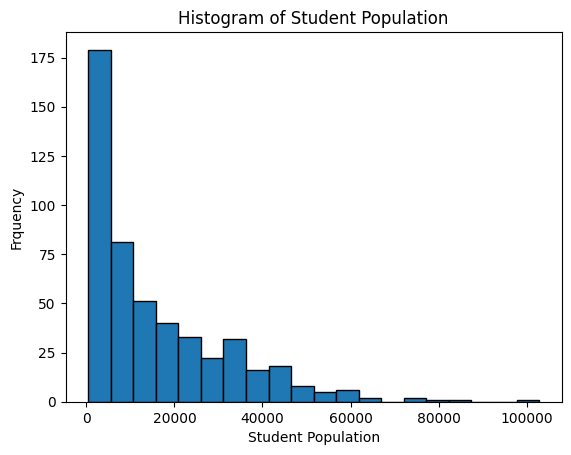

In [36]:
import matplotlib.pyplot as plt
df['studentPopulation'].plot(kind='hist', bins=20, edgecolor='black')

plt.title('Histogram of Student Population')
plt.xlabel('Student Population')
plt.ylabel('Frquency')
plt.show()